In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'
crimes= pd.read_csv("Downloads/Crimes_-_2001_to_Present_20250215.csv")

# Abstract

I will be conducting an **Exploratory Data Analysis** on crime in Chicago from 2020 to 2024. 
My goals are to : 
1. Document the most common type of crime 

2. Explore the correlation of crime to time and month 

3. Report on the frequency of dangerous crime 
- Explore homicide 
    
4. Identifying Crime Frequency of Chicago neighborhoods using Aldermanic Ward data

 

# Exploring The Dataset

In [2]:
crimes.shape 

(8257275, 22)

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8257275 entries, 0 to 8257274
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [4]:
crimes.head() #first 5 rows of the data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
4,13204489,JG416325,09/06/2023 11:00:00 AM,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,4.0,32.0,06,1176857.0,1896680.0,2023,11/04/2023 03:40:18 PM,41.871835,-87.626151,"(41.871834768, -87.62615082)"


## Dealing with Null Values

In [5]:
crimes.isna().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13961
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614827
Community Area          613453
FBI Code                     0
X Coordinate             91435
Y Coordinate             91435
Year                         0
Updated On                   0
Latitude                 91435
Longitude                91435
Location                 91435
dtype: int64

The values I am concerned about are in the Ward column. The columns with 91,435 values missing represent geographic location, and I won't use them for my analysis. However, I will use the location columns to retrieve missing values for the ward columns if possible.

# Sorting Data to The Last 5 Years 

In [11]:
crimes['Date']= pd.to_datetime(crimes['Date']) #converting date column to datetime 

In [12]:
years = [2020,2021,2022,2023,2024] 
five_yr_crimes = crimes[crimes['Date'].dt.year.isin(years)]

In [13]:
five_yr_crimes.shape #confirming dataframe change

(1181727, 22)

## Filling Missing Values for Wards and Police District

In [14]:
five_yr_crimes.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     6392
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                       33
Community Area              4
FBI Code                    0
X Coordinate            17605
Y Coordinate            17605
Year                        0
Updated On                  0
Latitude                17605
Longitude               17605
Location                17605
dtype: int64

The Ward column has 33 missing values. It is not much, but I would like to be as accurate as possible when exploring the dataset. Using Google Maps, I can use the location columns from the dataset to identify the geographic location of the crime and determine which aldermanic ward the missing value pertains to.  

In [15]:
ward_missing_bool = five_yr_crimes["Ward"].isna() #missing ward values
ward_missing= five_yr_crimes[ward_missing_bool] # isolate the dataset with the missing values
Howard_missing = ward_missing[ward_missing['Block'].str.contains("HOWARD ST")] #many values contained Howard ST

The values with block information containing "Howard St"  all have the same location. A google maps search indicated that the location is in the Donalds Addition and Rogers Park neighborhood which is the 49th ward and is the 24th police district. The next step is to replace the null values with that information 

In [16]:
Howard_missing["Ward"]= Howard_missing["Ward"].fillna(49.0) #fill in ward missing values
Howard_missing["District"]= Howard_missing["District"].fillna(24.0) #fill in district missing values


In [17]:
missing_values = Howard_missing["Ward"]
five_yr_crimes["Ward"] = five_yr_crimes["Ward"].fillna(missing_values)
five_yr_crimes.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     6392
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                       19
Community Area              4
FBI Code                    0
X Coordinate            17605
Y Coordinate            17605
Year                        0
Updated On                  0
Latitude                17605
Longitude               17605
Location                17605
dtype: int64

There are still 19 values missing. So, I will repeat the same process for the rest of the missing values.

In [18]:
five_yr_crimes[five_yr_crimes["Ward"].isnull()] #There is various values missing that are from O'Hare which is the 41st Ward

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
113557,12063729,JD247834,2020-05-30 19:00:00,069XX N NORTHWEST HWY,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,NaN,9.0,08B,1123402.0,1945216.0,2020,06/06/2020 03:41:51 PM,42.006065,-87.821345,"(42.006064572, -87.821344766)"
7195813,12098241,JD288382,2020-07-06 16:15:00,081XX W BALMORAL AVE,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,RESIDENCE,False,True,...,NaN,10.0,26,1120845.0,1934989.0,2020,09/07/2021 03:41:02 PM,41.978042,-87.830973,"(41.978042171, -87.83097323)"
7301699,12132469,JD328823,2020-08-08 10:30:00,065XX N HARLEM AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,NaN,10.0,06,1127377.0,1943106.0,2020,08/15/2020 03:43:11 PM,42.000208,-87.806768,"(42.000208379, -87.806767692)"
7315771,12115945,JD309190,2020-07-25 06:33:00,007XX W OHARE ST,1335,CRIMINAL TRESPASS,TO AIRPORT,AIRPORT EXTERIOR - SECURE AREA,False,False,...,NaN,76.0,26,1094587.0,1945065.0,2020,08/01/2020 03:41:55 PM,42.006074,-87.927365,"(42.006074109, -87.927364891)"
7333063,12379848,JE247753,2021-05-29 00:00:00,081XX W BALMORAL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,NaN,10.0,08B,1120930.0,1934992.0,2021,06/05/2021 03:40:05 PM,41.978049,-87.830661,"(41.978049035, -87.830660569)"
7362466,12278031,JE122753,2021-01-25 00:00:00,081XX W BALMORAL AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,NaN,10.0,11,1120942.0,1934992.0,2021,02/19/2021 03:39:34 PM,41.978049,-87.830616,"(41.978048841, -87.830616438)"
7397663,12244910,JD458899,2020-12-14 13:09:00,028XX W 115TH ST,0553,ASSAULT,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,True,False,...,NaN,NaN,04A,1159691.0,1828241.0,2020,01/26/2023 03:41:43 PM,41.684399,-87.691051,"(41.68439927, -87.691050781)"
7398011,12287641,JE134644,2021-02-06 18:43:00,007XX W OHARE ST,0484,BATTERY,"PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...",AIRPORT EXTERIOR - SECURE AREA,True,False,...,NaN,76.0,08B,1094587.0,1945065.0,2021,02/13/2021 03:40:04 PM,42.006074,-87.927365,"(42.006074109, -87.927364891)"
7442049,12379598,JE247282,2021-05-29 20:45:00,081XX W BALMORAL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,NaN,10.0,08B,1120930.0,1934992.0,2021,06/05/2021 03:40:05 PM,41.978049,-87.830661,"(41.978049035, -87.830660569)"
7447051,12400346,JE273377,2021-06-18 11:00:00,081XX W BALMORAL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,NaN,10.0,14,1120930.0,1934992.0,2021,06/25/2021 03:40:42 PM,41.978049,-87.830661,"(41.978049035, -87.830660569)"


In [19]:
ward_missing_bool = five_yr_crimes["Ward"].isna()
ward_missing= five_yr_crimes[ward_missing_bool]
Ohare_missing = ward_missing[ward_missing['Block'].str.contains("OHARE ST")]
Ohare_missing["Ward"]= Ohare_missing["Ward"].fillna(41.0)

In [20]:
Ohare_missing_values = Ohare_missing["Ward"]
five_yr_crimes["Ward"] = five_yr_crimes["Ward"].fillna(Ohare_missing_values )


In [21]:
five_yr_crimes[five_yr_crimes["Ward"].isnull()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
113557,12063729,JD247834,2020-05-30 19:00:00,069XX N NORTHWEST HWY,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,NaN,9.0,08B,1123402.0,1945216.0,2020,06/06/2020 03:41:51 PM,42.006065,-87.821345,"(42.006064572, -87.821344766)"
7195813,12098241,JD288382,2020-07-06 16:15:00,081XX W BALMORAL AVE,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,RESIDENCE,False,True,...,NaN,10.0,26,1120845.0,1934989.0,2020,09/07/2021 03:41:02 PM,41.978042,-87.830973,"(41.978042171, -87.83097323)"
7301699,12132469,JD328823,2020-08-08 10:30:00,065XX N HARLEM AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,NaN,10.0,06,1127377.0,1943106.0,2020,08/15/2020 03:43:11 PM,42.000208,-87.806768,"(42.000208379, -87.806767692)"
7333063,12379848,JE247753,2021-05-29 00:00:00,081XX W BALMORAL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,NaN,10.0,08B,1120930.0,1934992.0,2021,06/05/2021 03:40:05 PM,41.978049,-87.830661,"(41.978049035, -87.830660569)"
7362466,12278031,JE122753,2021-01-25 00:00:00,081XX W BALMORAL AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,NaN,10.0,11,1120942.0,1934992.0,2021,02/19/2021 03:39:34 PM,41.978049,-87.830616,"(41.978048841, -87.830616438)"
7397663,12244910,JD458899,2020-12-14 13:09:00,028XX W 115TH ST,0553,ASSAULT,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,True,False,...,NaN,NaN,04A,1159691.0,1828241.0,2020,01/26/2023 03:41:43 PM,41.684399,-87.691051,"(41.68439927, -87.691050781)"
7442049,12379598,JE247282,2021-05-29 20:45:00,081XX W BALMORAL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,NaN,10.0,08B,1120930.0,1934992.0,2021,06/05/2021 03:40:05 PM,41.978049,-87.830661,"(41.978049035, -87.830660569)"
7447051,12400346,JE273377,2021-06-18 11:00:00,081XX W BALMORAL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,NaN,10.0,14,1120930.0,1934992.0,2021,06/25/2021 03:40:42 PM,41.978049,-87.830661,"(41.978049035, -87.830660569)"
7658341,12828085,JF396056,2022-09-14 09:00:00,065XX N HARLEM AVE,1120,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,False,...,NaN,10.0,10,1127377.0,1943043.0,2022,01/03/2023 03:40:27 PM,42.000036,-87.806769,"(42.000035501, -87.806769117)"
7668487,12816101,JF382023,2022-09-03 18:45:00,065XX N HARLEM AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,...,NaN,10.0,08A,1127377.0,1943043.0,2022,01/03/2023 03:40:27 PM,42.000036,-87.806769,"(42.000035501, -87.806769117)"


11 rows remained after filling in the missing data. Upon further investigation, I noticed that the rest of the values all derive from the 41st ward. Therefore, I will fill the missing ward values with the same value of 41. 

In [22]:
five_yr_crimes["Ward"] = five_yr_crimes["Ward"].fillna(41.0)
five_yr_crimes[five_yr_crimes["Ward"].isnull()] #no missing ward values remained

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


Now that I have sorted the data to values from 2020-2024 and filled in the missing values, I can begin exploring the data. 

#  Chicago Arrests From 2020-2024

Calculating the number of Arrests per year using groupby operation. 

In [23]:
Arrests = five_yr_crimes[five_yr_crimes["Arrest"]==True] #selecting only values where arrest is true 
arrest_groupby = Arrests.groupby('Year') #grouping previous data by year
cnt_yr_arrest = arrest_groupby['Arrest'].count() #counting total amount of arrests per year
print(cnt_yr_arrest)

Year
2020    34173
2021    26595
2022    28137
2023    31968
2024    35041
Name: Arrest, dtype: int64


In [24]:
cnt_yr_arrest_df= pd.DataFrame(cnt_yr_arrest)
cnt_yr_arrest_df = cnt_yr_arrest_df .reset_index()
cnt_yr_arrest_df

,Year,Arrest
0,2020,34173
1,2021,26595
2,2022,28137
3,2023,31968
4,2024,35041


In [25]:
y_grouped  = five_yr_crimes.groupby('Year')
yr_h = y_grouped['Primary Type'].count()
Crimes_and_Arrests_1 = pd.merge(left = cnt_yr_arrest_df , right = yr_h, on = 'Year')
Crimes_and_Arrests_1.rename(columns={"Primary Type": "Crime_Count"}, inplace = True)
Crimes_and_Arrests_1

,Year,Arrest,Crime_Count
0,2020,34173,212546
1,2021,26595,209437
2,2022,28137,239686
3,2023,31968,262810
4,2024,35041,257248


In [26]:
Crimes_and_Arrests_1['Arrest'].diff()
#difference in years

0       NaN
1   -7578.0
2    1542.0
3    3831.0
4    3073.0
Name: Arrest, dtype: float64

In [27]:
round(((Crimes_and_Arrests_1['Arrest'][4] - Crimes_and_Arrests_1['Arrest'][1])/ Crimes_and_Arrests_1['Arrest'][1])*100,2)
#percent change since 2021 

31.76

/var/folders/tg/44q7hwts7n96248gzc1xgf3m0000gn/T/ipykernel_3027/2584082631.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','5,000','10,000','15,000','20,000','25,000','30,000', '35,000'])


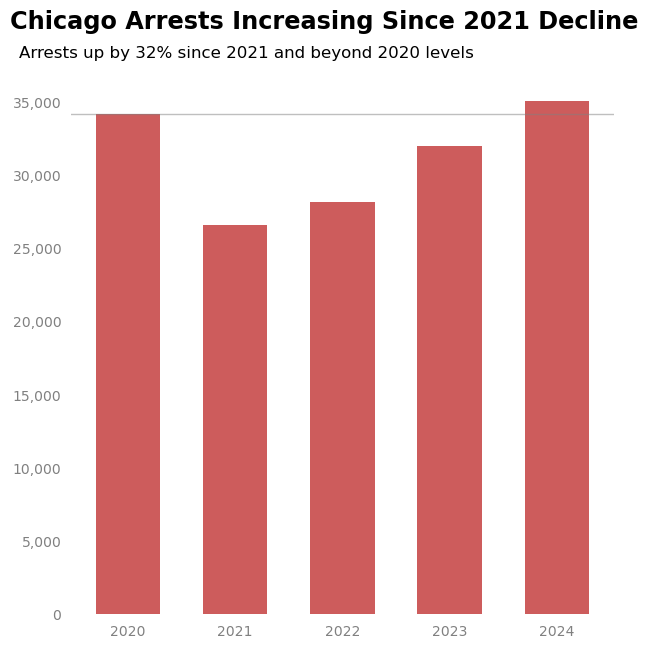

In [28]:
c_and_a_cc = Crimes_and_Arrests_1['Crime_Count']
c_and_a_a = Crimes_and_Arrests_1['Arrest']
c_and_a_y = Crimes_and_Arrests_1['Year']
x = c_and_a_y
fig, ax = plt.subplots(figsize = (7,7))
arrest_bar = ax.bar(x = c_and_a_y , height = c_and_a_a, align='center', width = 0.6, color = 'indianred')
ax.set_yticklabels(['0','5,000','10,000','15,000','20,000','25,000','30,000', '35,000'])
ax.text(x = 2018.9 ,y= 40000,s= 'Chicago Arrests Increasing Since 2021 Decline', fontsize = 'xx-large', fontweight = 'semibold')
ax.text(x = 2018.98 ,y= 38000, s = 'Arrests up by 32% since 2021 and beyond 2020 levels', fontsize = 'large')
ax.tick_params(bottom=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.axhline(y= 34173,c='grey', alpha=0.5, linewidth= 1 )
plt.show()


# Chicago's Top Five Most Reported Crime From 2020 - 2024 

In [29]:
top_5_crimes = five_yr_crimes['Primary Type'].value_counts()[:5]
print(top_5_crimes)

THEFT                  254770
BATTERY                213208
CRIMINAL DAMAGE        135838
ASSAULT                105472
MOTOR VEHICLE THEFT     92946
Name: Primary Type, dtype: int64


In [30]:
series_top_5_crimes = pd.Series(top_5_crimes)
series_top_5_crimes = series_top_5_crimes.reset_index()

/var/folders/tg/44q7hwts7n96248gzc1xgf3m0000gn/T/ipykernel_3027/3798999282.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','50,000','100,000','150,000','200,000','250,000'])


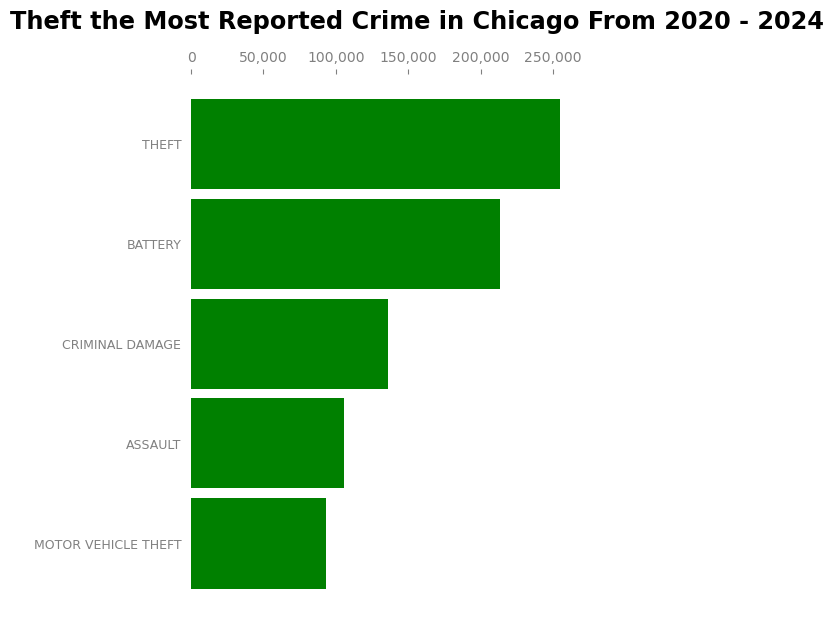

In [520]:
barh_cat = series_top_5_crimes['index']
barh_count = series_top_5_crimes['Primary Type']
fig, ax = plt.subplots(figsize = (5,7))
ax.barh(barh_cat,
        barh_count,height=0.9, color = '#008000')
ax.text(x=-125000, y = -1.15, s = 'Theft the Most Reported Crime in Chicago From 2020 - 2024', fontsize = 'xx-large', fontweight = 'semibold')
ax.tick_params(axis='y', labelsize=9, colors='#808080')
ax.invert_yaxis()
ax.set_xticklabels(['0','50,000','100,000','150,000','200,000','250,000'])
ax.xaxis.tick_top()
ax.tick_params(axis='x', colors='#808080')
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(left=False)


# Homicide Count From 2020-2024

### Calculating Homicides Per Year

In [32]:
five_yr_homicides = five_yr_crimes[five_yr_crimes['Primary Type']=='HOMICIDE']
yearly_homicides = five_yr_homicides.groupby('Year')
yr_h = yearly_homicides['Primary Type'] #all primary type values are homicide 
cnt_yearly_homicides = yr_h.count()
print(cnt_yearly_homicides)

Year
2020    796
2021    811
2022    733
2023    632
2024    585
Name: Primary Type, dtype: int64


### Calculating Homicide Arrests Per Year

In [34]:
Arrests = five_yr_crimes[five_yr_crimes["Arrest"]==True]
homicide_arrests = Arrests[Arrests['Primary Type']=='HOMICIDE']
homicide_arrest_year_groupby = homicide_arrests.groupby('Year')
cnt_h_arrest = homicide_arrest_year_groupby['Arrest'].count()
print(cnt_h_arrest)

Year
2020    351
2021    292
2022    314
2023    227
2024    162
Name: Arrest, dtype: int64


### Merging Homicide Data 

In [35]:
Homicide_and_Arrests = pd.merge(left = cnt_yearly_homicides, right = cnt_h_arrest, on = 'Year')
Homicide_and_Arrests.rename(columns={"Primary Type": "Homicides"}, inplace = True)
Homicide_and_Arrests.rename(columns={"Arrest": "Homicide_Arrests"}, inplace = True)
print(Homicide_and_Arrests)

      Homicides  Homicide_Arrests
Year                             
2020        796               351
2021        811               292
2022        733               314
2023        632               227
2024        585               162


In [36]:
Homicide_and_Arrests_df= pd.DataFrame(Homicide_and_Arrests)
Homicide_and_Arrests_df = Homicide_and_Arrests_df.reset_index()

In [37]:
homicide_arrests_diff=[]

for v in Homicide_and_Arrests_df:
    h = Homicide_and_Arrests_df['Homicides']
    ha = Homicide_and_Arrests_df['Homicide_Arrests']
    hap = round((ha/h)*100,2)
homicide_arrests_diff.append(hap)
    
print(homicide_arrests_diff)

[0    44.10
1    36.00
2    42.84
3    35.92
4    27.69
dtype: float64]


In [38]:
had_series = pd.Series([44.10,36.00,42.84,35.92,27.69],name = 'Percent_Arrested')
print(had_series)

0    44.10
1    36.00
2    42.84
3    35.92
4    27.69
Name: Percent_Arrested, dtype: float64


In [39]:
Homicide_info = pd.concat([Homicide_and_Arrests_df, had_series], axis=1)
Homicide_info

,Year,Homicides,Homicide_Arrests,Percent_Arrested
0,2020,796,351,44.10
1,2021,811,292,36.00
2,2022,733,314,42.84
3,2023,632,227,35.92
4,2024,585,162,27.69


In [208]:
Homicide_info["Percent_Arrested"].mean() #Average of percent arrested

37.31

## Percent Arrested Difference

In [40]:
print(Homicide_info['Percent_Arrested'].diff() )# calculating difference

0     NaN
1   -8.10
2    6.84
3   -6.92
4   -8.23
Name: Percent_Arrested, dtype: float64


In [231]:
pd_series = pd.Series([0,-8.10,6.84,-6.92,-8.23], name = 'Arrest_Percent_Difference') #creating series for percent arrested 
Homicide_info = pd.concat([Homicide_info, pd_series], axis=1)
Homicide_info

,Year,Homicides,Homicide_Arrests,Percent_Arrested,Arrest_Percent_Difference
0,2020,796,351,44.10,0.00
1,2021,811,292,36.00,-8.10
2,2022,733,314,42.84,6.84
3,2023,632,227,35.92,-6.92
4,2024,585,162,27.69,-8.23


Overall homicides have been decreasing over the last 5 years. The trend is similar for arrests. It is difficult to discern the causes for the decrease in arrests. Nevertheless, despite the positive outcome of decreased homicides, the lack of homicide arrests is an alarming issue for public safety.

## Calculating Percent Change for Homicides

In [233]:
hom_diff = round(Homicide_and_Arrests_df['Homicides'].pct_change(),2)  #percent change 
hom_series = pd.Series([0, 2.0,-10.0,-14.0,-7.0,], name = 'Homicide_Per_Difference') #creating series 
Homicide_info = pd.concat([Homicide_info, hom_series], axis=1) #combining to df

In [234]:
new_order = ['Year','Homicides','Homicide_Per_Difference', 'Homicide_Arrests','Percent_Arrested','Arrest_Percent_Difference']
Homicide_info_2 = Homicide_info[new_order]
Homicide_info_2


,Year,Homicides,Homicide_Per_Difference,Homicide_Arrests,Percent_Arrested,Arrest_Percent_Difference
0,2020,796,0.0,351,44.10,0.00
1,2021,811,2.0,292,36.00,-8.10
2,2022,733,-10.0,314,42.84,6.84
3,2023,632,-14.0,227,35.92,-6.92
4,2024,585,-7.0,162,27.69,-8.23


### Observations

When comparing the homicide percentage difference and arrest percent difference, it is evident that homicide, for the most part, is on a decline since 2022. However, there is no clear trend with arrest percent differences. In 2021, a 2% increase in homicides produced an %8 decline in arrests. The following year, a 10% decline in arrests produced an apoximated 7% increase in arrests. The following years produced a decline in both rates. What is descernable from the data is that the average homicide arrest is about 37% and that in over the last two years, homicides and homicide arrests have been decreasing.

### Graph on Homicides and Homicide Arrests

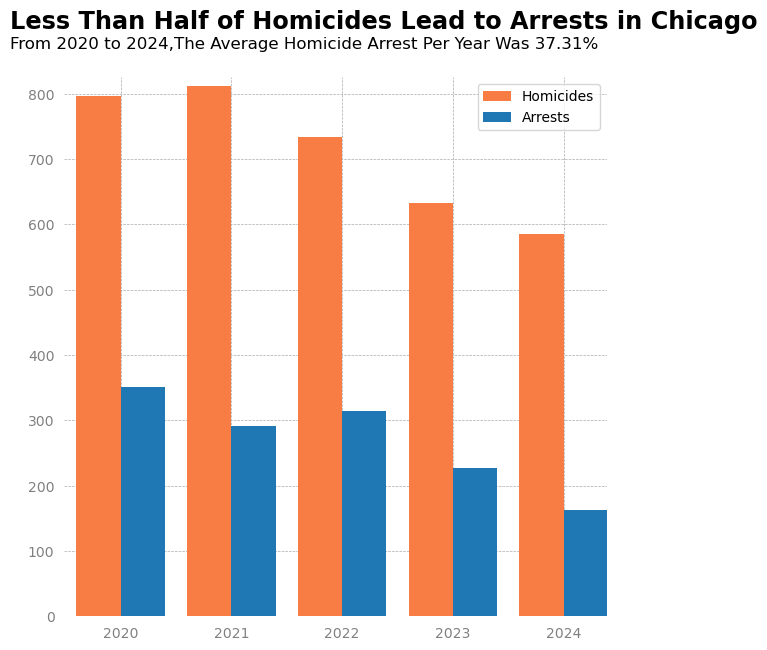

In [230]:
X = [2020,2021,2022,2023,2024]
bar_Homicide_year = Homicide_info['Year']
bar_Homicides = Homicide_info['Homicides']
bar_Homicide_arrests = Homicide_info['Homicide_Arrests']

fig, ax = plt.subplots(figsize = (7,7))
X_axis = np.arange(len(X)) 
ax.bar(X_axis - .2, bar_Homicides, 0.4, label = 'Homicides', color= '#f77d44', zorder = 2)
ax.bar(X_axis + 0.2, bar_Homicide_arrests,0.4, label = 'Arrests',zorder =2)
plt.xticks(X_axis, X)
ax.text(x = -1 ,y= 900 ,s= 'Less Than Half of Homicides Lead to Arrests in Chicago', fontsize = 'xx-large', fontweight = 'semibold')
ax.text(x = -1 ,y= 870, s = 'From 2020 to 2024,The Average Homicide Arrest Per Year Was 37.31%', fontsize = 'large')
ax.tick_params(bottom=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.grid(color='darkgray',visible=True,linewidth=.5, zorder= 1, ls = '--')
plt.ylim(0, 825)
plt.xlim(-.5099, 4.39)
plt.legend() 
plt.show()



### Graph For Yearly Homicides

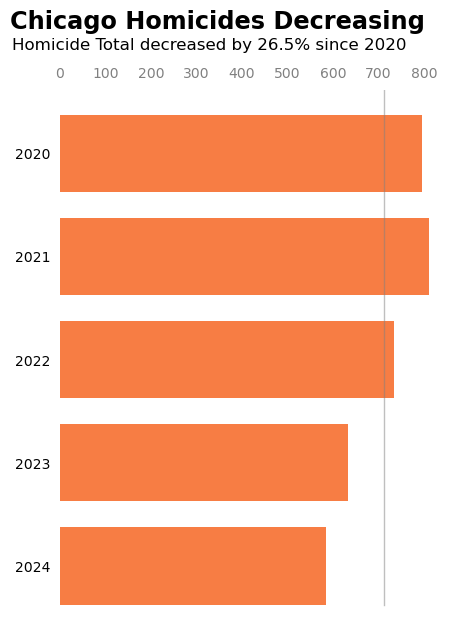

Percent Change since 2020 =  -26.51
Average homicides over the last 4 years = 711.4


In [228]:
barh_Homicide_year = Homicide_info['Year']
barh_Homicides = Homicide_info['Homicides']

fig, ax = plt.subplots(figsize = (5,7))
ax.barh(barh_Homicide_year,
        barh_Homicides,height=0.75,
        color= '#f77d44')
ax.text(x = -110 ,y= 2018.79 ,s= 'Chicago Homicides Decreasing', fontsize = 'xx-large', fontweight = 'semibold')
ax.text(x = -105 ,y= 2018.99, s = 'Homicide Total decreased by 26.5% since 2020', fontsize = 'large')
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.axvline(x=711,ymin=0.045,c='grey', alpha=0.5, linewidth= 1)
plt.show()
print("Percent Change since 2020 = ", round(((585 - 796)  / 796) * 100,2) ) #percent change
print("Average homicides over the last 4 years =", barh_Homicides.sum()/5) #average 

# Serious Crimes

This section will cover the frequency of 'serious crimes' in Chicago. According to the Federal Bureau of Investigations, 

    "The UCR Program collects data about Part I offenses in order to measure the level and scope of crime occurring throughout the nation. The program’s founders chose these offenses because they are serious crimes, they occur with regularity in all areas of the country, and they are likely to be reported to the police."(Offense Definitions 2019)

List of serious crimes :
1. Criminal homicide
2. Rape
3. Robbery
4. Aggravated assault
5. Burglary (breaking or entering)
6. Larceny-theft (except motor vehicle theft)
7. Motor vehicle theft
8. Arson
9. Human Trafficking, commercial sex acts
10. Human Trafficking, involuntary servitude

In [73]:
five_yr_crimes["Primary Type"].unique()

array(['OFFENSE INVOLVING CHILDREN', 'NARCOTICS', 'CRIMINAL DAMAGE',
       'THEFT', 'SEX OFFENSE', 'ROBBERY', 'MOTOR VEHICLE THEFT',
       'BURGLARY', 'BATTERY', 'HOMICIDE', 'CRIMINAL SEXUAL ASSAULT',
       'OTHER OFFENSE', 'WEAPONS VIOLATION', 'DECEPTIVE PRACTICE',
       'STALKING', 'CRIMINAL TRESPASS', 'ASSAULT', 'PROSTITUTION',
       'KIDNAPPING', 'ARSON', 'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'HUMAN TRAFFICKING',
       'GAMBLING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'CRIM SEXUAL ASSAULT',
       'RITUALISM'], dtype=object)

In [74]:
serious_crimes = ['SEX OFFENSE','MOTOR VEHICLE THEFT','ARSON','ROBBERY', 'ASSAULT', 'BURGLARY', 'CRIMINAL SEXUAL ASSAULT','HOMICIDE', 'HUMAN TRAFFICKING','CRIM SEXUAL ASSAULT']

In [75]:
five_yr_scrimes = five_yr_crimes[five_yr_crimes['Primary Type'].isin(serious_crimes)] # filter only dangerous crimes
five_yr_scrimes['Primary Type'].value_counts()

ASSAULT                    105472
MOTOR VEHICLE THEFT         92946
ROBBERY                     44914
BURGLARY                    38907
CRIMINAL SEXUAL ASSAULT      7507
SEX OFFENSE                  5882
HOMICIDE                     3557
ARSON                        2534
CRIM SEXUAL ASSAULT            75
HUMAN TRAFFICKING              57
Name: Primary Type, dtype: int64

In [76]:
top_8_serious_crimes = five_yr_scrimes['Primary Type'].value_counts().head(8)
top_8_serious_crimes

ASSAULT                    105472
MOTOR VEHICLE THEFT         92946
ROBBERY                     44914
BURGLARY                    38907
CRIMINAL SEXUAL ASSAULT      7507
SEX OFFENSE                  5882
HOMICIDE                     3557
ARSON                        2534
Name: Primary Type, dtype: int64

Text(-3.5, 1.6, 'Assault in Chicago accounted for more than 105,400 reports in recent years')

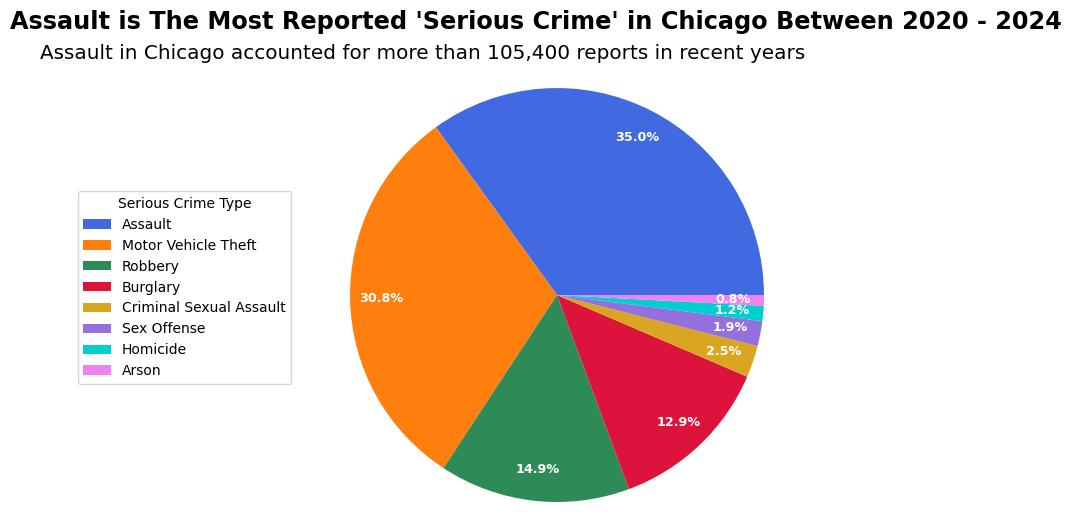

In [115]:
fig, ax = plt.subplots()
pie_label = ['Assault','Motor Vehicle Theft','Robbery','Burglary','Criminal Sexual Assault','Sex Offense','Homicide','Arson']
pie_colors = ['royalblue','tab:orange','seagreen','crimson','goldenrod','mediumpurple','darkturquoise','violet']
ax.pie(top_8_serious_crimes,autopct='%.1f%%', textprops={'fontsize': 9.2, 'color': 'white', 'weight': 'heavy'},
       labeldistance=1.35, pctdistance=.85, radius =1.4, colors = pie_colors)
ax.legend(title='Serious Crime Type',labels = pie_label, bbox_to_anchor=(-.2, .8), loc='upper right')
#plt.title( "From 2020 to 2024, Assault leads in most reports for Serious Crimes")
ax.text(x = -3.7, y = 1.8, s= "Assault is The Most Reported 'Serious Crime' in Chicago Between 2020 - 2024",fontsize = 'xx-large', fontweight = 'semibold')
ax.text(x= -3.5, y= 1.6, s = 'Assault in Chicago accounted for more than 105,400 reports in recent years', fontsize = 'x-large')

## Closer Look at Serious Crimes Per Year

In [78]:
yearly_scrimes = five_yr_scrimes.groupby('Year')
yr_sc = yearly_scrimes['Primary Type']
cnt_yearly_scrimes = yr_sc.count()
print(cnt_yearly_scrimes) #serious crime count per year 

Year
2020    48453
2021    49517
2022    62819
2023    74573
2024    66489
Name: Primary Type, dtype: int64


In [79]:
serious_crimes_2020 = five_yr_scrimes[five_yr_scrimes['Year']==2020] #Sorting serious crimes per year
serious_crimes_2021 = five_yr_scrimes[five_yr_scrimes['Year']==2021]
serious_crimes_2022 = five_yr_scrimes[five_yr_scrimes['Year']==2022]
serious_crimes_2023 = five_yr_scrimes[five_yr_scrimes['Year']==2023]
serious_crimes_2024 = five_yr_scrimes[five_yr_scrimes['Year']==2024]

## What Are The Top 3 Most Reported Crimes Per Year?

In [80]:
serious_crimes_2020['Primary Type'].value_counts().head(3)

ASSAULT                18259
MOTOR VEHICLE THEFT     9959
BURGLARY                8758
Name: Primary Type, dtype: int64

In [81]:
serious_crimes_2021['Primary Type'].value_counts().head(3).head(3)

ASSAULT                20343
MOTOR VEHICLE THEFT    10605
ROBBERY                 7920
Name: Primary Type, dtype: int64

In [82]:
serious_crimes_2022['Primary Type'].value_counts().head(3).head(3)

MOTOR VEHICLE THEFT    21466
ASSAULT                20810
ROBBERY                 8964
Name: Primary Type, dtype: int64

In [83]:
serious_crimes_2023['Primary Type'].value_counts().head(3).head(3)

MOTOR VEHICLE THEFT    29252
ASSAULT                22626
ROBBERY                11052
Name: Primary Type, dtype: int64

In [84]:
serious_crimes_2024['Primary Type'].value_counts().head(3).head(3)

ASSAULT                23434
MOTOR VEHICLE THEFT    21664
ROBBERY                 9123
Name: Primary Type, dtype: int64

A significant observation from the data is the increase in **motor vehicle theft**. The lowest report was in 2020 with 9,959. At its highest it was 29,252 in 2023. This is an outstanding **193% increase**. However, in 2024 motor vehicle theft decreased by aproximately **26%** with a total of 21,664 reports. 

Moreover, assault reports have been growing minimally and steadily since 2020. 

# Creating Table For Top 3 Serious Crimes

## Motor Vehicle Theft

In [85]:
five_yr_vehicle_theft =five_yr_scrimes[five_yr_scrimes['Primary Type'] == 'MOTOR VEHICLE THEFT']
vehicle_theft_groupby=five_yr_vehicle_theft.groupby('Year')
vehicle_theft_column = vehicle_theft_groupby['Primary Type']
yrly_vehicle_theft = vehicle_theft_column .count()
print(yrly_vehicle_theft)

Year
2020     9959
2021    10605
2022    21466
2023    29252
2024    21664
Name: Primary Type, dtype: int64


## Assault 

In [87]:
five_yr_assault =five_yr_scrimes[five_yr_scrimes['Primary Type'] == 'ASSAULT']
assault_groupby=five_yr_assault.groupby('Year')
assault_column = assault_groupby['Primary Type']
yrly_assault = assault_column.count()
print(yrly_assault)

Year
2020    18259
2021    20343
2022    20810
2023    22626
2024    23434
Name: Primary Type, dtype: int64


## Robbery 

In [89]:
five_yr_robbery =five_yr_scrimes[five_yr_scrimes['Primary Type'] == 'ROBBERY']
robbery_groupby=five_yr_robbery.groupby('Year')
robbery_column = robbery_groupby['Primary Type']
yrly_robbery = robbery_column.count()
print(yrly_robbery)

Year
2020     7855
2021     7920
2022     8964
2023    11052
2024     9123
Name: Primary Type, dtype: int64


## Findings

In [525]:
print("Motor Vehicle Theft in 2024 has increased by",round(((21664-9959)/9959)*100,2),"since 2020")

Motor Vehicle Theft in 2024 has increased by 117.53 since 2020


In [526]:
print("Assault increased by", round(((23434 - 18259)/18259)*100,2),"%","from 2020 to 2024")

Assault increased by 28.34 % from 2020 to 2024


In [527]:
print("Robbery has increased from 2020 to 2024 by",round(((9123-7855)/7855)*100,2),"%")
print("The average robbery frequency from 2020 to 2024 is", yrly_robbery.mean())
print("Chicago experienced a robbery spike of 11,052 in 2023. A", 11052-8964,"increase of the previous year.")

Robbery has increased from 2020 to 2024 by 16.14 %
The average robbery frequency from 2020 to 2024 is 8982.8
Chicago experienced a robbery spike of 11,052 in 2023. A 2088 increase of the previous year.


## Merging data on Top 3 Serious Crimes

In [91]:
Top_3_Serious_Crimes = pd.merge(left = yrly_vehicle_theft, right = yrly_assault, on = 'Year')
Top_3_Serious_Crimes.rename(columns={"Primary Type_x": "Motor Vehicle Theft"}, inplace = True)
Top_3_Serious_Crimes.rename(columns={"Primary Type_y": "Assault"}, inplace = True)
Top_3_Serious_Crimes = pd.merge(left = Top_3_Serious_Crimes, right = yrly_robbery, on ='Year')
Top_3_Serious_Crimes.rename(columns={"Primary Type": "Robbery"}, inplace = True)
Top_3_Serious_Crimes= Top_3_Serious_Crimes.reset_index()
Top_3_Serious_Crimes

,Year,Motor Vehicle Theft,Assault,Robbery
0,2020,9959,18259,7855
1,2021,10605,20343,7920
2,2022,21466,20810,8964
3,2023,29252,22626,11052
4,2024,21664,23434,9123


## Graphing Top 3 Serious Crimes

/var/folders/tg/44q7hwts7n96248gzc1xgf3m0000gn/T/ipykernel_3027/33774135.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['10,000','15,000','20,000','25,000','30,000','35,000'])


Text(2019.4, 31555.99, 'From 2020 to 2023, motor vehicle theft increased by 193% ')

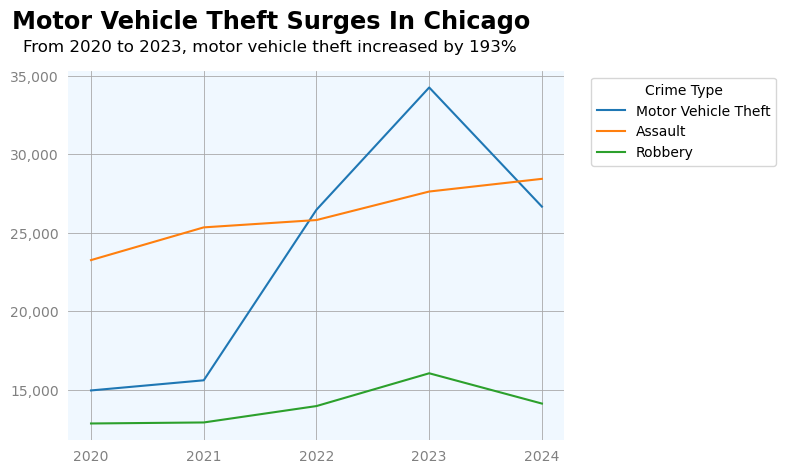

In [132]:
line_years = Top_3_Serious_Crimes['Year']
fig, ax = plt.subplots()
ax.plot(line_years, Top_3_Serious_Crimes['Motor Vehicle Theft'], label = 'Motor Vehicle Theft')
ax.plot(line_years, Top_3_Serious_Crimes['Assault'], label = "Assault")
ax.plot(line_years, Top_3_Serious_Crimes['Robbery'], label = "Robbery")
ax.set_xticks(years)
ax.set_yticklabels(['10,000','15,000','20,000','25,000','30,000','35,000'])
ax.tick_params(left = False, bottom = False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.grid(color='darkgray',visible=True,linewidth=.6,)
ax.set_facecolor('aliceblue')
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.legend(title='Crime Type', bbox_to_anchor=(1.04, 1), loc='upper left')
ax.text(x = 2019.3 ,y= 33000.79 ,s= 'Motor Vehicle Theft Surges In Chicago  ', fontsize = 'xx-large', fontweight = 'semibold')
ax.text(x = 2019.4 ,y= 31555.99, s = 'From 2020 to 2023, motor vehicle theft increased by 193% ', fontsize = 'large')


### Observations

Assault frequency has been on a steady incline in over the last four years with an increase of 28.34 % 

Robbery has increased from 2020 to 2024 by 16.14 %
Chicago experienced a robbery spike of 11,052 in 2023. A 2088 increase of the previous year.

A significant observation from the data is the increase in motor vehicle theft. The lowest report was in 2020 with 9,959. At its highest it was 29,252 in 2023. This is an outstanding 193% increase. However, in 2024 motor vehicle theft decreased by aproximately 26% with a total of 21,664 reports.

Overall, oppposite trend to that of homicides, Serious crimes have been increasing over the last 4 years reaching a peak in 2023 and a decrease in 2024 that is still well above the total count of serious crimes from 2020 to 2022. 

# Most Reported and Least Reported Crimes Per Aldermanic Ward

Exploring reported crime per aldermanic wards can give insight to the degree in which Chicago neighborhoods experience crime. By identifying the ward, I will use Google to pin point the neighborhoods belonging to the specific wards. Furthermore, I will gather ward information using Aldermanic map provided by Illinois Policy and ward demographics using the Chicago Recovery Plan. 

In [95]:
ward_reported_crimes = five_yr_crimes['Ward'].value_counts().sort_values(ascending=False)

In [324]:
ward_reported_crimes.iloc[:5] #Top 5 Wards with most reported crime

27.0    53695
28.0    53610
42.0    48282
6.0     44731
24.0    42894
Name: Ward, dtype: int64

In [326]:
ward_reported_crimes.iloc[-5:] #Bottom 5 Wards of least reported crime

33.0    12261
39.0    11871
13.0    11838
19.0    10953
38.0    10687
Name: Ward, dtype: int64

The aldermanic wards with the most reported crime within the last 5 years are the 27th and 28th ward, both with about 53,600 reports. On the contrary, the 19th and 38th wards represent the least reporting wards with approximately 10.5k-11k reports.     

# Aldermanic Wards And 'Serious Crimes'


In [238]:
ward_dcrimes = five_yr_scrimes.groupby('Ward')
Ward_dc = ward_dcrimes['Primary Type']
cnt_wdc = Ward_dc.count().sort_values(ascending = False)

### Top 5 in Serious Crimes

In [307]:
top_5_ward_sc = cnt_wdc.head(5)
print(top_5_ward_sc) 

Ward
28.0    13676
6.0     13157
27.0    12981
8.0     11334
7.0     10638
Name: Primary Type, dtype: int64


The 28th ward and 27th ward are in the top 5 list of serious crimes. Both wards appear in the top 3 for most reported crime for aldermanic wards.The 6th ward is second on the list with 13,157 reports. 

### Bottom 5 in Serious Crimes 

In [312]:
print(cnt_wdc.tail(5)) 

Ward
43.0    2781
39.0    2714
19.0    2353
38.0    2319
41.0    2237
Name: Primary Type, dtype: int64


The 19th ward and 38th ward appear in the bottom list for both reported crimes and serious crimes. The 41st ward is the least reporting for serious crimes.

# Exploring Cumulative Reported Homicides by Aldermanic Ward 

In [310]:
five_yr_homicides = five_yr_crimes[five_yr_crimes['Primary Type']=='HOMICIDE']
ward_homicides = five_yr_homicides.groupby('Ward')
Ward_h = ward_homicides['Primary Type'] #all primary type values are homicide 
cnt_ward_homicides = Ward_h.count().sort_values(ascending = False) #Ward leading in homicides

## Average, Median, Average Difference

In [322]:
avg_ward_homicides = cnt_ward_homicides .mean()
median_ward_homicides = cnt_ward_homicides .median()
ward_homicides_diff_avg = round(cnt_ward_homicides.diff().mean(),0)
print('Average homicide count per ward between 2020-2024 =' ,avg_ward_homicides .round(2))
print('Median homicide count per ward between 2020-2024  =',median_ward_homicides )
print('Average Difference of homicides per ward between 2020-2024 is =',ward_homicides_diff_avg,'homicides')

Average homicide count per ward between 2020-2024 = 71.14
Median homicide count per ward between 2020-2024  = 38.0
Average Difference of homicides per ward between 2020-2024 is = -6.0 homicides


### Top 10 most homicides 

In [301]:
top10_ward_homicides = cnt_ward_homicides.iloc[:10]
print(top10_ward_homicides) #top 10 on the list
print("\n")
print("Range of the top 10 list for homicides is", 305-150)
print("The difference between the 28th ward and 24th ward is", 305-225)
print("The 28th and 27th ward, represented in previous lists for crimes, are in this list as well")
print("The 6th ward, appearing second for most reported serious crimes, is third on this list")

Ward
28.0    305
24.0    225
6.0     211
16.0    202
8.0     179
9.0     173
27.0    169
17.0    160
21.0    159
7.0     150
Name: Primary Type, dtype: int64


Range of the top 10 list for homicides is 155
The difference between the 28th ward and 24th ward is 80
The 28th and 27th ward, represented in previous lists for crimes, are in this list as well
The 6th ward, appearing second for most reported serious crimes, is third on this list


### Closer Look at Top 10 list

In [300]:
print(top10_ward_homicides.diff()) # Measuring differences of homicide frequency between wards

Ward
28.0     NaN
24.0   -80.0
6.0    -14.0
16.0    -9.0
8.0    -23.0
9.0     -6.0
27.0    -4.0
17.0    -9.0
21.0    -1.0
7.0     -9.0
Name: Primary Type, dtype: float64


In [276]:
for v in top10_ward_homicides: #difference of homicide count of 28th ward in comparison to other wards
    print (v-305)

0
-80
-94
-103
-126
-132
-136
-145
-146
-155


In [277]:
top10_ward_homicides.iloc[1:].diff().mean() #difference of values excluding the 1st value 

-9.375

The 28th ward experiences disporportionately more homicides than other aldermanic wards. The average difference between the alderamnic wards is about 9 homicides. The difference between the ward with most homicides is stark with a difference of over 80 homicides. 

### Least Reported Homides Per Ward

In [315]:
print(cnt_ward_homicides.iloc[40:]) #bottom 10 on the list
print("\n")
print("The range for the bottom 10 for homicides is",11-3)
print("Recurring wards from the previous list of least reported crimes are the 38th,19th, and 41st wards")
print("The 43rd ward has reported only 3 homicides in the last 5 years")

Ward
47.0    11
2.0     10
45.0     9
32.0     7
44.0     7
19.0     7
38.0     6
13.0     6
41.0     4
43.0     3
Name: Primary Type, dtype: int64


The range for the bottom 10 for homicides is 8
Recurring wards from the previous list of least reported crimes are the 38th,19th, and 41st wards
The 43rd ward has reported only 3 homicides in the last 5 years


## Classifying Safe Aldermanic Wards

   ### Safe Aldermanic Wards

The wards consistently appearing least for frequency of crimes and homicides are: 
- 38th ward
- 13th ward
- 19th ward 
- 43rd Ward
- 41st ward

### Safe Aldermanic Wards Demographics

***1. The ward with the Least Reported Crime is the 38th Ward.It's neighborhoods are:***
- Schorch Forest View
- Irving Wood
- Belmont Terrace
- Belmont Heights
- Dunning
- Schorsch Village 
- Portage Park
- Martin Luther

> **38th Ward Income:**
- 26.6% of its residents make between 75k-125k 
- 24.0% make over 125k.
- 17.0% make 50k-75k
- 15.6% make 25k-50k
- 14.8% Under 25k
    
> **38th Ward Race/Ethnicity:**
- 60.4% White
- 29.4% Hispanic
- 6.0% Asian
- 1.9% Black 

The 38th ward is made up of high income households. The racial/ethnic make up of the ward is about 60% White and 30% Hispanic. 

***2. The 43rd ward reports the Least Amount of Homicides and has the neighborhoods of:***
- Lincoln Park, 
- Gold Coast 
- Old Town Triangle. 

> **43rd Ward Income** 

- 45.4% make over 125k
- 19.9% make between 75k - 125k 

> **43rd Ward Demographics**
- 80.9% White
- 7.6% Asian 
- 5.4% Hispanic
- 3.2% Black 

The 43rd ward is a very affluent. Approximately 45% of its residents are upper middle class. About 81% of its residents are White. 

3. **The 41st Ward Reports the Least Amount of Serious Crimes** and is composed of:
- Ohare
- Oriole Park
- Edison Park
- Norwood Park
- Union Ridge 
- Big Oaks 

**41st Ward Income** 

- 26.9 % are upper middle class making over 125k a year.
- 25.2 % of its residents are middle class making between 75k - 125k a year
- 17.5% 50k -75k
- 15.6% 25k-50k
- 14.8% Under 25k

**41st Ward Demographics**

- 67.6% White
- 22.1% Hispanic
- 6.2% Asian 
- 1.6% Black 

The 41st Ward has income groups that are more equally distributed. Nevertheless, the larger portion of residents are middle to higher class. The 41st ward is predominately White(67.6%) but has a 20% Hispanic population. 

4. **The 13th ward** , located on the far west side of the city, reports a low amount of total crime and homicides. Its neighborhoods are: 
- West Lawn
- Chrysler Village
- Garfield Ridge
- Clearing
- Clearing West


**13th Ward Income**

The Household income ranges in the 13th ward are more equally distributed:
- 22.9% of households make between 25k-50k
- 20.8% make over 125k
- 20.7% make between 75k-125k
- 18.4% make between 50-75k
- 17.2% under 25k


**13th Ward Demographics**

- 62.9% Hispanic
- 34.5% White
- 0.6% Asian
- 1.5% Black 

The 13th ward's income groups are close to being equally distributed with the lower class and lower middle class (25-50k)slightly being more representative(22.9%). The ward is also predominately Hispanic with the second biggest group being White. 

5. **One of the wards with the least reported crime, the 19th ward**, located on the southwest edge of the city, contains the neighborhoods of :
- Beverly 
- West Beverly 
- East Beverly 
- Morgan Park
- West Morgan Park 
- MT Greenwood
- Kennedy Park
- Beverly Woods

**19th Ward Income**

- 30.5% make over 125k
- 24.3% make between 75k-125k
- 16.1% make 25-50k
- 14.8% make 50-75k
- 14.3% under 25k

**19th Ward Demographics**

- 52.9% White
- 35.1% Black
- 8% Hispanic
- 1% Asian

The 19th ward can is an affluent ward where most residents are making over 125k and are upper middle class. Furthermore, approximately 53% are White and 35% are Black, a group often not represented in safe aldermanic wards. 

### Observations


Many households in aldermanic wards that do not report high volumes of crimes and homicides are predominately White and Hispanic, affluent households making over 75k or 125k and higher. There are two wards, the 41st and 13th, where the income groups are close to being equally distributed. The 19th ward is the only ward where there is a large population of residents that are Black. 

### Unsafe Aldermanic Wards

***1. The 28th ward has the most reported crimes along with the most homicides in the last 5 years. It is located towards the west side of downtown Chicago. It's neighborhoods are :***

- West Garfield Park
- East Garfield Park
- Near West Side
- Fifth City
- Tri-Taylor
- Greektown
- Douglas Park

> 28th Ward Household Income
- 33.2%  make less than 25k a year. 
- 20.9%  make between 25k-50k a year. 

> 28th Ward Race/Ethnicity 
- 49.6% Black
- 22.5% Hispanic
- 18.6% White
- 6.9% Asian.

The racial composition of the 28th ward is mostly composed of Black residents(49.6%), followed by Hispanics (22.5%) and White residents (18.6%). In the 28th ward, about 33% of the households are making below the poverty line of 25k. 

***2. The 27th ward ranks high for reported crimes and reported serious crimes. Its aldermanic boundaries covers the neighborhoods of:***

- Humboldt Park
- Smith Park
- East Garfield Park
- Illinois Medical District 
- Fulton Market District
- River West 
- Cabrini-Green 

> 27th Ward Household Income
- 37.8% make over 125k a year
- 20% make between 75k-125k 
- 19.5% make under 25k a year

> 27th Ward Race/Ethnicity 
- 46.5% of its residents are White,
- 26.1% Black, 
- 14.3% Hispanic
- 9.5% Asian.

The 27th ward is interesting. The racial make up of the ward is diverse in comparison to other wards. Although it is predominately White, about a quarter of its residents are black and the minority groups are Hispanic and Asians that account for approximately 15% and 10% respectively.  

Household income is also interesting. In the ward, about 40% of its households make over 125k a year, 20% make between 75k-125k, and about 20% of its households make less than 25k a year. The ward is predomitaley upper class but 1/5th of its residents are also on the lower tier of the income bracket making less than 25k.


***3. The 6th ward experiences high volumes of serious crimes and homicides. It is composed of :***
- Englewood
- Chatham
- Greater Grand Crossing

> 6th Ward Households Income 
- 40.7% make under 25k, 
- 23.0%	make between 25k - 50k.

> 6th Ward Race/Ethnicity 
- 95.6% Black 
- 1.3% Hispanic 
- 0.8% White 
- 0.3% Asian

In the 6th ward, 40% of its households make an income below 25k, and 23% of the households make low income or lower middle class income. The ward is not racially diverse. About 96% of its residents are Black. 

***4. The 24th ward experienced the second most homicides in the last 5 years. It is composed of:***

- Homan Square
- Lawndale
- North Lawndale
- Douglas Park 
- Marshall Square

> 24th Ward Households Income 
- 41.9% make less than 25k
- 27.7% make between 25k - 50k.

> 24th Ward Race/Ethnicity
- 64.7% Black 
- 27.5% Hispanic 
- 6.1% White 
- 0.5% Asian

The 24th ward shares similarities with that of the 6th ward in which aproximately 40% of its residents are making about or less than 25k. About 27.7% of income in the ward is classified as lower class and lower middle class in the 25k-50k range. The ward is predominately Black (64.7%) and Hispanic (27.5%). 

***5. The 8th ward is in the top 5 for both serious crimes and homicides. It's neighborhoods are:***

- Grand Crossing
- Avalon Park
- Burnside
- Cottage Grove Heights
- Calmut Heights

> 8th Ward Households Income 
- 28.7% of its households make under 25k 
- 25% make between 25k - 50k 

> 8th Ward Race/Ethnicity
- Black 96.3%
- White 1.2%
- Hispanic 1.1%
- Asian 0.3%

In the 8th ward, 3/10th of its residents make less than 25k while 1/4 make between 25k-50k. The ward is majority Black(96.3%).

## Observations 

The wards that experience the most serious crimes and homicides have many household incomes that are below 25k. Many wards that experience such volumes of crimes and homicides have about 30% of its households earning below 25k. Moreover, these wards are predominately Black.

The exception to the list is the 27th ward. The ward reports high volumes of crimes and serious crimes, but it's income groups are mostly composed of populations below the poverty line (19.5%), the upper middle class (20%), and upper class (37.8%).




# At what Time and Month Does Crime Mostly Occur?

In [101]:
time = five_yr_crimes['Date'].dt.hour #extracting the hour
time_count = time.value_counts() #summing the total count of values per hour 

In [102]:
hourly_crimes_df = pd.DataFrame(time_count)
hourly_crimes_df = hourly_crimes_df.reset_index()
hourly_crimes_df_copy = hourly_crimes_df.copy()

In [103]:
hourly_crimes_df  = hourly_crimes_df.sort_values(by='index')

In [104]:
hourly_crimes_df = hourly_crimes_df.rename(columns={'Date': 'Reported_Crimes', 'index': 'Hour'})
hourly_crimes_df

,Hour,Reported_Crimes
0,0,85122
17,1,38976
18,2,34422
19,3,29075
21,4,23729
23,5,20499
22,6,21566
20,7,28539
16,8,39623
14,9,50796


In [292]:
hourly_crimes_df.iloc[0,1] - hourly_crimes_df.iloc[12,1] #difference of reported crime

15708

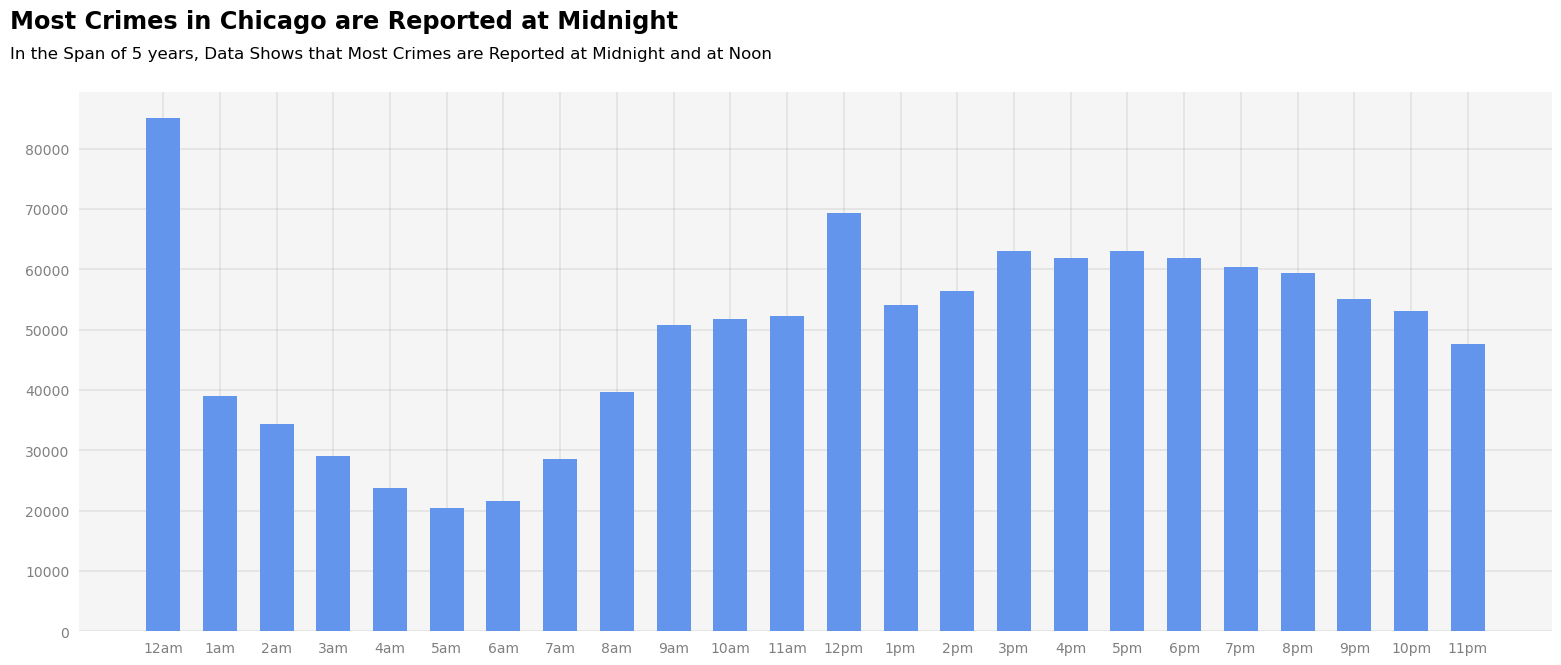

In [544]:
barh_hc_offenses = hourly_crimes_df['Reported_Crimes']
barh_hc_hours = hourly_crimes_df['Hour'].sort_values()
x = barh_hc_hours 
xlabel = (['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'])
fig, ax = plt.subplots(figsize = (19,7))
ax.set_xticks(x, labels = xlabel )
offense_bar = ax.bar(x = x , height = barh_hc_offenses, align='center', width = 0.6, color = 'cornflowerblue', zorder=2)
ax.text(x = -2.7 ,y= 100000 ,s= 'Most Crimes in Chicago are Reported at Midnight', fontsize = 'xx-large', fontweight = 'semibold')
ax.text(x = -2.7 ,y= 95000, s = 'In the Span of 5 years, Data Shows that Most Crimes are Reported at Midnight and at Noon', fontsize = 'large')
ax.tick_params(bottom=False, left = False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(color='darkgray',visible=True,linewidth=.3, zorder=1)
plt.show()

#graphs times are not in order 

Looking at all crimes within the last 4 years, the data shows that most crime is reported at midnight with a count of 85,122 . Crime is least reported in the morning, specifically at 5am, with a count of 20,499 . The range is 64,623.



## Serious Crimes 

In [296]:
time_scrimes= five_yr_scrimes['Date'].dt.hour
print(time_scrimes.value_counts())

0     19684
18    16469
17    16378
19    16060
20    15978
16    15576
15    15547
21    15368
22    15202
12    13944
23    13426
14    13412
13    12165
11    11624
10    11342
9     10957
1     10653
2      9878
8      9825
3      8747
7      8030
4      7782
5      6990
6      6814
Name: Date, dtype: int64


Regarding serious crimes, most reports happen at midnight and the least reports are at 6 in the morning. Most serious crimes happen between 5pm to 10pm. Serious crimes are least reported in the morning between 4am and 6am. 

## Homicides

In [110]:
time_homicides = five_yr_homicides['Date'].dt.hour
print(time_homicides.value_counts())

0     206
21    204
20    202
1     201
23    200
22    196
2     193
17    188
15    188
18    183
19    182
16    174
3     153
14    144
13    135
12    133
4     120
5     103
7      89
6      86
11     84
9      75
10     64
8      54
Name: Date, dtype: int64


Most homicide reports occur at between 9pm and 2 am. The least reported time is at 8 in the morning. 

# In Which Months Do Most Crimes and Homicides Take Place?

In [532]:
month = five_yr_crimes['Date'].dt.month
#isolating month from datetime

In [531]:
month_count = month.value_counts()
print(month_count)

7     109298
8     107922
10    106461
9     105041
6     103208
5     100837
11     95881
12     94416
3      93026
1      92815
4      87838
2      84984
Name: Date, dtype: int64


In [390]:
month_count_df = pd.DataFrame(month_count)
month_count_df= month_count_df .reset_index()
month_count_df= month_count_df.rename(columns={'index': 'Month'})
month_count_df= month_count_df.rename(columns={'Date': 'Count'})
month_count_df['Count']= month_count_df['Count'].sort_values(ascending = False)
month_count_df

,Month,Count
0,7,109298
1,8,107922
2,10,106461
3,9,105041
4,6,103208
5,5,100837
6,11,95881
7,12,94416
8,3,93026
9,1,92815


/var/folders/tg/44q7hwts7n96248gzc1xgf3m0000gn/T/ipykernel_3027/3283880655.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','20,000','40,000','60,000','80,000','100,000','120,000'])


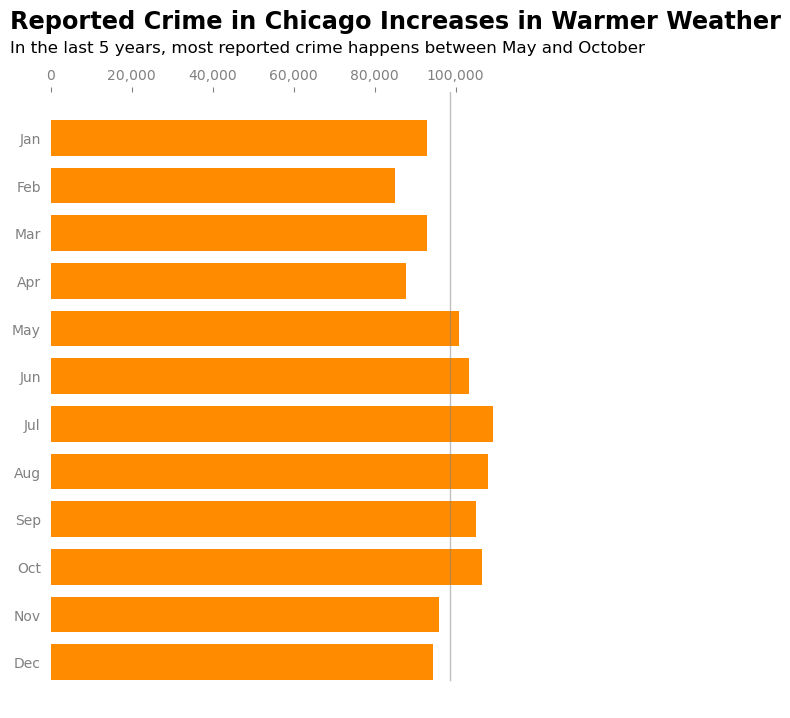

In the last 5 years, the average for reported crimes per month is 98477.25
In the last 5 years, the median for reported crimes per month is 98359.0


In [530]:
barh_crimes_month = month_count_df['Month']
barh_crimes_count = month_count_df['Count']
months_ybar = (['Jul','Aug','Oct','Sep','Jun','May','Nov','Dec','Mar','Jan','Apr','Feb'])
fig, ax = plt.subplots(figsize = (6,8))
ax.barh(barh_crimes_month,barh_crimes_count,
        height=0.75,
        color= 'darkorange')
ax.set_yticks(barh_crimes_month)
ax.set_yticklabels(months_ybar)
ax.set_xticklabels(['0','20,000','40,000','60,000','80,000','100,000','120,000'])
ax.text(x = -10000 ,y= -1.3 ,s= 'Reported Crime in Chicago Increases in Warmer Weather', fontsize = 'xx-large', fontweight = 'semibold')
ax.text(x = -10000 ,y= -.8, s = 'In the last 5 years, most reported crime happens between May and October', fontsize = 'large')
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
ax.axvline(x=98477.25,ymin=0.045,c='grey', alpha=0.5, linewidth= 1)
plt.show()
print("In the last 5 years, the average for reported crimes per month is",month_count_df['Count'].mean())
print("In the last 5 years, the median for reported crimes per month is",month_count_df['Count'].median())

## Monthly Homicides 

In [460]:
monthly_hom = five_yr_homicides['Date'].dt.month
monthly_hom_count = monthly_hom.value_counts()
monthly_hom_count

7     423
6     391
9     349
5     339
8     333
10    305
11    277
4     270
12    253
1     224
3     199
2     194
Name: Date, dtype: int64

## Monthly Homicide Table

In [470]:
monthly_hom_count_df = pd.DataFrame(monthly_hom_count)
monthly_hom_count_df= monthly_hom_count_df.reset_index()
monthly_hom_count_df= monthly_hom_count_df.rename(columns={'index': 'Month'})
monthly_hom_count_df= monthly_hom_count_df.rename(columns={'Date': 'Count'})
monthly_hom_count_df['Count']= monthly_hom_count_df['Count'].sort_values(ascending = False)
montahly_hom_count_df

,Month,Count
0,7,423
1,6,391
2,9,349
3,5,339
4,8,333
5,10,305
6,11,277
7,4,270
8,12,253
9,1,224


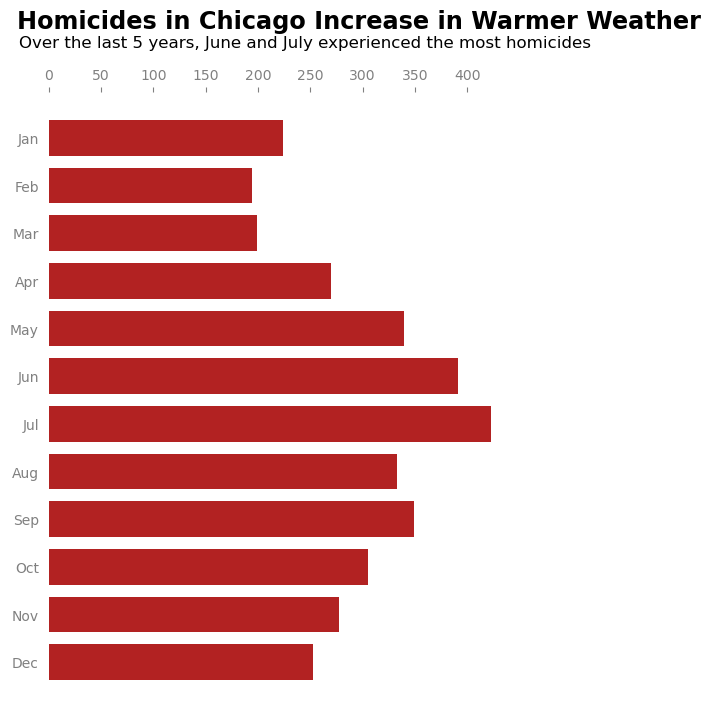

The average reported monthly homicide in the last 5 years is 296.4166666666667


In [537]:
barh_hom_month = monthly_hom_count_df['Month']
barh_hom_count = monthly_hom_count_df['Count']
months_ylabel = (['Jul','Jun','Sep','May','Aug','Oct','Nov','Apr','Dec','Jan','Mar','Feb'])
fig, ax = plt.subplots(figsize = (6,8))
ax.barh(barh_hom_month,barh_hom_count,
        height=0.75,
        color= 'firebrick')
ax.set_yticks(barh_hom_month)
ax.set_yticklabels(months_ylabel)
ax.text(x = -30 ,y= -1.3 ,s= 'Homicides in Chicago Increase in Warmer Weather', fontsize = 'xx-large', fontweight = 'semibold')
ax.text(x = -28 ,y= -.9, s = 'Over the last 5 years, June and July experienced the most homicides ', fontsize = 'large')
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
plt.show()
print("The average reported monthly homicide in the last 5 years is", monthly_hom_count_df['Count'].mean())

In [511]:
#Homicide Descriptions
five_yr_homicides['Description'].value_counts()

FIRST DEGREE MURDER         3528
RECKLESS HOMICIDE             27
INVOLUNTARY MANSLAUGHTER       1
SECOND DEGREE MURDER           1
Name: Description, dtype: int64

In [542]:
#Where do homicides take place ?
five_yr_homicides['Location Description'].value_counts().head(10)

STREET           1925
APARTMENT         301
AUTO              230
ALLEY             222
HOUSE             145
PARKING LOT       110
YARD              107
PORCH              95
GAS STATION        46
PARK PROPERTY      46
Name: Location Description, dtype: int64

# Findings

The goals of the  **Exploratory Data Analysis** on crime in Chicago from 2020 to 2024 are to : 
1. Document the most common type of crime 

2. Explore the correlation of crime to time and month 

3. Report on the frequency of serious crime and homicides
    
4. Identifying Crime Frequency of Chicago neighborhoods using Aldermanic Ward data

 

We have found that :
- Chicago arrests increased since its 2021 decline. As of 2024, arrests were up by 32% since 2021
- In Chicago, less than half of homicides lead to arrests
- Over the last 5 years(2020-2024) the most reported crimes were in the following order: Theft, Battery, Criminal Damage, Assault, and Motor Vehicle Theft
- Since 2020, Homicides in Chicago have been decreasing. As of 2024, homicides are down by 26.5%
- The most reported **Serious crimes** in the last 5 years are Assault, Motor Vehicle Theft, Robbery, and Burglary. The top 2 most reported are Assault(35%) and Motor Vehicle Theft(30.8%)
    - Of the top 3, Motor Vehicle Theft surged, robbery has increased since 2020 and then decreased in 2023, and Assault is on a steady incline.
- Most crimes are reported at midnight
- Most serious crimes are reported at midnight
- Most homicides occur between 9pm and 2am
- Reported crime increases in warmer weather, roughly between May and October
- Reported homicides increase over the summer, particularly in June and July 

# Discourse

To reasonably analyze crime data in Chicago, one must be familiar with the association between crime and poverty and the structure of the Chicago landscape. First, it is important to know that  "Chicago is one of the most segregated cities in the United States"(Serrato et al., 2022). This means that communities are predimonately composed of people of the same race and/or social class. 

In regards to poverty, according to 2024 Poverty Guidelines by the U.S. Department of Health and Human Services, any household with a family size of 2 earning 20,440 dollars annually are considered at the poverty line. A household with a family size of 3 is at the poverty line at 25,820 dollars in annual income (2024 Poverty Guidelines: 48 Contiguous States (all states except Alaska and Hawaii)).

In this study, the information provided by the Chicago Recovery Plan does not specify household size. Therefore, it is difficult to discern how many households earn at or below the poverty line. Nevertheless, one can assume that there are households living in poverty within the percentage of households making less than 25k. 

This information is crucial for understanding the context of crimes and poverty. According to U.S. Department of Justice, "persons living in poor households at or below the Federal Poverty Level had more than double the
rate of violent victimization as persons in high-income households"(Harrell et al., 2014). Nonetheless, although a link between violent crime and poverty can be attributed, the literature for such a link between non-violent crime and poverty is minimal. 

# References

Chicago, C. of. (n.d.). Chicago Recovery Plan. https://chirecoveryplan.com/ 

Chicago alderman. Illinois Policy. (2016, April 20). https://www.illinoispolicy.org/maps/chicago-alderman/ 

Federal Bureau of Investigation . (2019, September 13). Offense Definitions. FBI: UCR. Retrieved From https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/topic-pages/offense-definitions 

Harrell, E., Langton, L., Berzofsky, M., Couzens, L., & Smiley-McDonald, H. (2014, November). Household Poverty and Nonfatal Violent Victimization , 2008-2012. Bureau of Justice Statistics. Retrieved From: https://bjs.ojp.gov/content/pub/pdf/hpnvv0812.pdf 

Serrato, J., Sier, P., & Runes, C. (2022, February 24). Mapping Chicago’s racial segregation: FIRSTHAND: Segregation. Mapping Chicago’s Racial Segregation. Retrieved From: https://www.wttw.com/firsthand/segregation/mapping-chicago-racial-segregation 


U.S. Department of Health and Human Services, Office of the Assistant Secretary for Planning and Evaluation. (2024). 2024 Poverty Guidelines: 48 Contiguous States (all states except Alaska and Hawaii). Retrieved From: https://aspe.hhs.gov/sites/default/files/documents/7240229f28375f54435c5b83a3764cd1/detailed-guidelines-2024.pdf
